[0.9702551029463707, 0.956039680371489, 0.8711555996679811, 1.0323970330260082, 1.007332451924372, 1.0670651739493564, 0.9720375967838575, 1.002286553459284, 0.9345125204247526, 0.9948514888094536, 1.0147535621303805, 0.9951783389219323, 0.9663411779310347, 0.9975872905294034, 1.0509092848683568, 1.0246340327362258, 0.9078096037683426, 0.9298135820383864, 0.9688393934876425, 0.9599787000069203, 1.0944548646414496, 1.1467843586178734, 1.1235538323686478, 1.0062949968535635, 1.0221584441861318, 0.8907184938701822, 0.9199415740413872, 1.0081613004426702, 1.002668449567941, 1.037620323493433, 1.0879531252893448, 0.8829229566555117, 0.9864703232721813, 1.0470803667284263, 0.9824800298394796, 0.9929020650227308, 0.9664841244528896, 1.058699960984908, 1.0079419861802674, 0.9968113540176188, 0.8697881589340408, 0.9124002235215241, 0.9525860980040837, 1.0184525900560595, 1.0649425199297606, 1.0597596636378992, 1.04913667972676, 0.9851120593165468, 1.0830312636585564, 0.9985939154249082, 1.14033

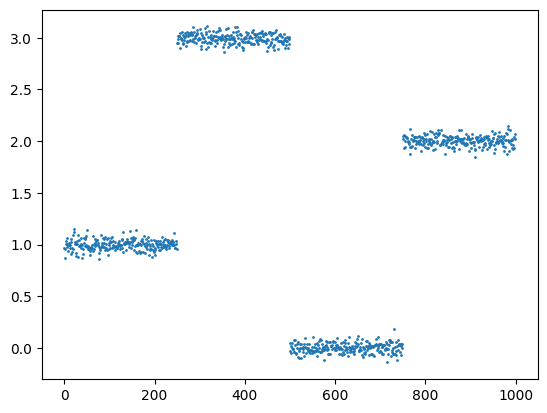

In [4]:
import matplotlib.pyplot as plt

s = []
file_in = open('signal.txt', 'r')
for i in file_in.read().split('\n'):
    try:
        s.append(float(i))
    except:
        pass

print(s)

plt.scatter(range(len(s)),s, s=1)

In [19]:
import numpy as np

iden_999 = np.identity(999)

l1 = np.c_[iden_999, np.zeros(999)]

l2 = np.c_[np.zeros(999), -iden_999]

L = l1 + l2

LT = np.transpose(L)

I = np.identity(1000)

lam = [0.1, 1, 10, 100, 1000]
denoised = dict()

for l in lam:
    A_hat = I + l * (LT @ L)
    denoised[l] = np.linalg.solve(A_hat, s)

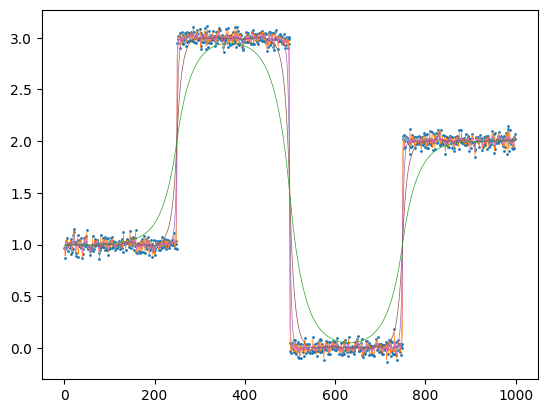

In [31]:
plt.scatter(range(len(s)),s, s=1)
plt.plot(range(len(s)), denoised[0.1], 'tab:orange', lw = 0.5)
plt.plot(range(len(s)), denoised[1], 'tab:pink', lw = 0.5)
plt.plot(range(len(s)), denoised[10], 'tab:purple', lw = 0.5)
plt.plot(range(len(s)), denoised[100], 'tab:brown', lw = 0.5)
plt.plot(range(len(s)), denoised[1000], 'tab:green', lw = 0.5)

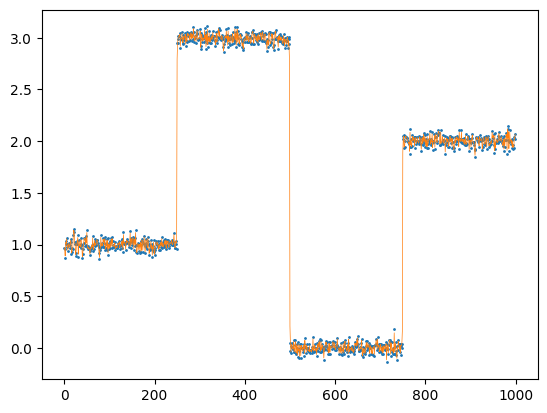

In [33]:
plt.scatter(range(len(s)),s, s=1)
plt.plot(range(len(s)), denoised[0.1], 'tab:orange', lw = 0.5)

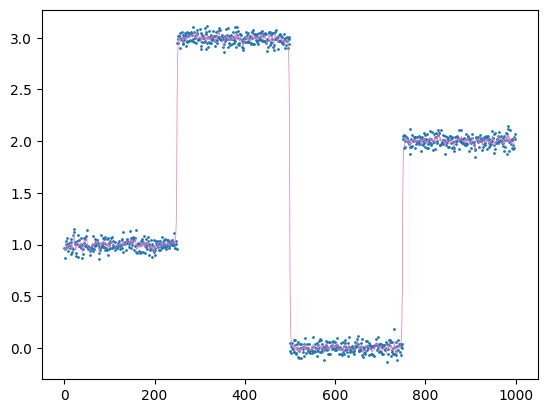

In [34]:
plt.scatter(range(len(s)),s, s=1)
plt.plot(range(len(s)), denoised[1], 'tab:pink', lw = 0.5)

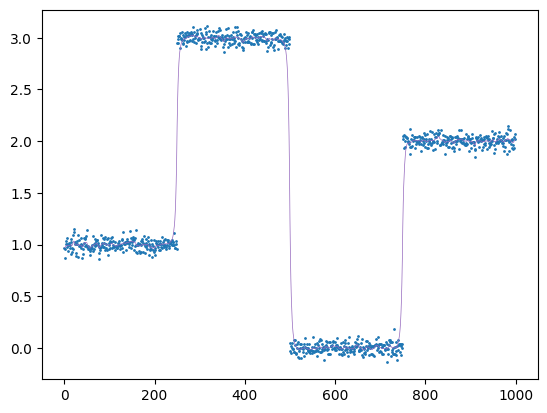

In [35]:
plt.scatter(range(len(s)),s, s=1)
plt.plot(range(len(s)), denoised[10], 'tab:purple', lw = 0.5)

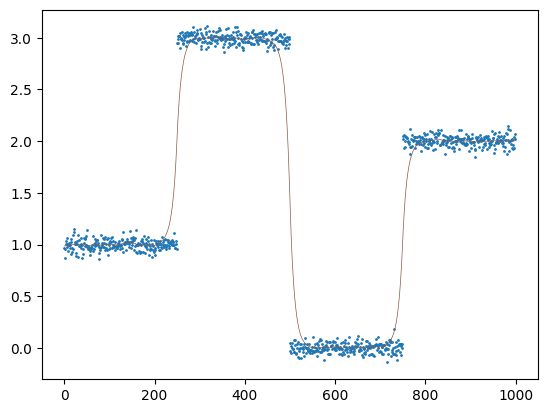

In [36]:
plt.scatter(range(len(s)),s, s=1)
plt.plot(range(len(s)), denoised[100], 'tab:brown', lw = 0.5)

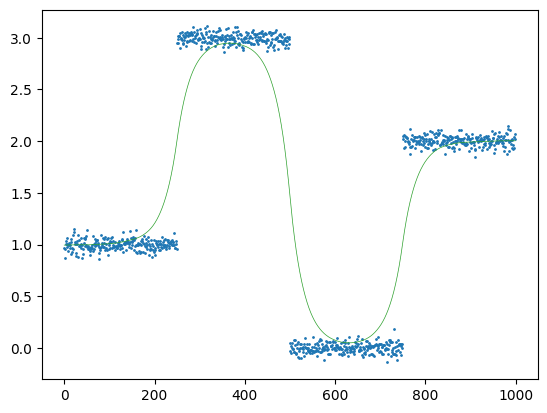

In [32]:
plt.scatter(range(len(s)),s, s=1)
plt.plot(range(len(s)), denoised[1000], 'tab:green', lw = 0.5)

$$
Hi
$$

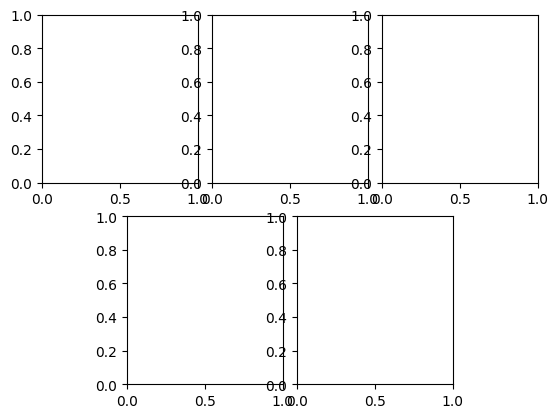

<Figure size 640x480 with 0 Axes>

In [29]:
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

plt.show()
plt.tight_layout(pad=5, w_pad=5, h_pad=5)